In [ ]:
%matplotlib inline

In [ ]:
#!pip install spacy

In [ ]:
#!python -m spacy download en_core_web_sm

In [ ]:
import pandas as pd
import numpy as np
import time
import re
import nltk
import spacy

#tokenization
from nltk.tokenize import TreebankWordTokenizer
#Lemmatization
from nltk.stem import WordNetLemmatizer
#Stemming
from nltk.stem import PorterStemmer

#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
#if-then-else rules
from sklearn import tree
from sklearn.tree import _tree

#creating batches
import itertools

#rf feature importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

#rf classifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
directory_location = 'G:/My Drive/IDS finals/data/'

task 1.1 keyword: corpus, feature extraction, if-then-else rules

In [ ]:
df_abs1 = pd.read_csv(directory_location + 'df_abs.tsv', sep = '\t')

In [ ]:
df_abs1['abstract']

0        Cracking process is a very important process t...
1        Swietenia mahagoni (Mahogany) is a traditional...
2        Low-density polyethylene (LDPE) is one of the ...
3        Understanding the influence of operating param...
4        A solution model consisted of two different mo...
                               ...                        
49441    One of the main problems with glaucoma through...
49442    Primary care physicians must conduct a stagger...
49443    Since optical coherence tomography (OCT) is we...
49444    Modeling the propagation of coherent polarized...
49445    Graph-based methods for retinal layer segmenta...
Name: abstract, Length: 49446, dtype: object

In [ ]:
df_abs = open(directory_location + 'df_abs.txt', "r", encoding = 'UTF-8')

In [ ]:
#numbers = "12 34 56"
#result = numbers.split() #split by ws
#print(result)

In [ ]:
id_list = []
control_treatment_list = []
wordlist_list = []

count = 0
for line in df_abs.readlines():
  line = line.replace("\n", " ") #\n to white space
  count = count + 1  
  id_list.append(count)

  parsed_by_space = line.split() # parsing each line with space 

  control_treatment = parsed_by_space[0]
  control_treatment_list.append(control_treatment)
    
  wordlist = " ".join(parsed_by_space[1:])
  shortword = re.compile(r'\W*\b\w{1,2}\b')
  wordlist = shortword.sub("", wordlist)
  wordlist = " ".join(parsed_by_space[1:])
  wordlist = wordlist.replace(";", " ").split()
  wordlist = " ".join(wordlist[:])
 #remove shortwords of 1,2 alphabet
 # wordlist = [word.split(';') for word in wordlist]
 # wordlist_list.append(wordlist)
  wordlist_list.append(wordlist)

print("#data points: ", count, " .")
corpus1 = wordlist_list

#data points:  49446  .


In [ ]:
corpus1

['Cracking process is a very important process that converts low value products into high value products such as conversion of naphtha into ethylene and propylene. The process is nonlinear with extensive reaction network. Thus, nonlinear technique such as artificial neural network is explored to develop the model of the system. The paper will review and discuss the research works done on the technique in modelling cracking process using artificial neural network starting from early 1990s until recent development in 2015. Timeline is provided to show progression of work done throughout the years, the main issues addressed, and the proposed techniques for each. In the next section, the main objective of each work and each techniques explored by previous researchers is discussed in more detail. A table that summarizes previous works is provided to show common works done throughout the years. Lastly, potential gap for future works in the area is highlighted. © Published under licence by IO

In [ ]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
corpus1 = [lemmatizer.lemmatize(list_num) for list_num in corpus1]
corpus1 = [stemmer.stem(list_num) for list_num in corpus1]

lemmatized, stemmed corpus 

In [ ]:
corpus1

['cracking process is a very important process that converts low value products into high value products such as conversion of naphtha into ethylene and propylene. the process is nonlinear with extensive reaction network. thus, nonlinear technique such as artificial neural network is explored to develop the model of the system. the paper will review and discuss the research works done on the technique in modelling cracking process using artificial neural network starting from early 1990s until recent development in 2015. timeline is provided to show progression of work done throughout the years, the main issues addressed, and the proposed techniques for each. in the next section, the main objective of each work and each techniques explored by previous researchers is discussed in more detail. a table that summarizes previous works is provided to show common works done throughout the years. lastly, potential gap for future works in the area is highlighted. © published under licence by io

In [ ]:
import os
os.environ['PATH'] = os.environ['PATH'] + 'C:\\Program Files\\gs\\gs0.09\\bin\\'

vectorized corpus to DataFrame

In [ ]:
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import RegexpParser
from nltk import Tree
import pandas as pd

# Defining a grammar & Parser
NP = "NP: {(<V\w+>|<NN\w?>)+.*<NN\w?>}"
chunker = RegexpParser(NP)

def get_continuous_chunks(text, chunk_func=ne_chunk):
    chunked = chunk_func(pos_tag(word_tokenize(text)))
    continuous_chunk = []
    current_chunk = []

    for subtree in chunked:
        if type(subtree) == Tree:
            current_chunk.append(" ".join([token for token, pos in subtree.leaves()]))
        elif current_chunk:
            named_entity = " ".join(current_chunk)
            if named_entity not in continuous_chunk:
                continuous_chunk.append(named_entity)
                current_chunk = []
        else:
            continue

    return continuous_chunk


#df = pd.DataFrame({'text':['This is a foo, bar sentence with New York city.', 
                        #   'Another bar foo Washington DC thingy with Bruce Wayne.']})

corpus2 = pd.DataFrame({'text' : corpus1})
print(corpus2)
#corpus1['text'].apply(lambda sent: get_continuous_chunks(sent, chunker.parse))

                                                    text
0      cracking process is a very important process t...
1      swietenia mahagoni (mahogany) is a traditional...
2      low-density polyethylene (ldpe) is one of the ...
3      understanding the influence of operating param...
4      a solution model consisted of two different mo...
...                                                  ...
49441  one of the main problems with glaucoma through...
49442  primary care physicians must conduct a stagger...
49443  since optical coherence tomography (oct) is we...
49444  modeling the propagation of coherent polarized...
49445  graph-based methods for retinal layer segmenta...

[49446 rows x 1 columns]


In [ ]:
corpus2.head()

,text
0,cracking process is a very important process t...
1,swietenia mahagoni (mahogany) is a traditional...
2,low-density polyethylene (ldpe) is one of the ...
3,understanding the influence of operating param...
4,a solution model consisted of two different mo...


In [ ]:
corpus2_1 = corpus2['text'].apply(lambda sent: get_continuous_chunks(sent, chunker.parse)) 

In [ ]:
corpus2_1 #np extracted

0        [cracking process, value products, value produ...
1        [swietenia mahagoni, process parameters, parti...
2        [low-density polyethylene, high-capacity tubul...
3        [operating parameters towards cracking severit...
4        [solution model, weight cut, feed concentratio...
                               ...                        
49441    [market today, angiography filters, develop in...
49442    [care physicians, record reviews, care market,...
49443    [coherence tomography, tooth surfaces, carbon ...
49444    [polarized light, turbid scattering medium, mo...
49445    [layer segmentation, voxel location, use edges...
Name: text, Length: 49446, dtype: object

In [ ]:
corpus2_1 = pd.DataFrame(corpus2_1)
corpus2_1

,text
0,"[cracking process, value products, value produ..."
1,"[swietenia mahagoni, process parameters, parti..."
2,"[low-density polyethylene, high-capacity tubul..."
3,[operating parameters towards cracking severit...
4,"[solution model, weight cut, feed concentratio..."
...,...
49441,"[market today, angiography filters, develop in..."
49442,"[care physicians, record reviews, care market,..."
49443,"[coherence tomography, tooth surfaces, carbon ..."
49444,"[polarized light, turbid scattering medium, mo..."


In [ ]:
#오래걸려서 저장
corpus2_1.to_csv(directory_location + 'corpus2_1.tsv', sep = '\t', index = False, encoding = 'UTF-8')

In [ ]:
c2 = pd.read_csv(directory_location + 'corpus2_1.tsv', sep = '\t')
c2

,text
0,"['cracking process', 'value products', 'value ..."
1,"['swietenia mahagoni', 'process parameters', '..."
2,"['low-density polyethylene', 'high-capacity tu..."
3,['operating parameters towards cracking severi...
4,"['solution model', 'weight cut', 'feed concent..."
...,...
49441,"['market today', 'angiography filters', 'devel..."
49442,"['care physicians', 'record reviews', 'care ma..."
49443,"['coherence tomography', 'tooth surfaces', 'ca..."
49444,"['polarized light', 'turbid scattering medium'..."


In [ ]:
c2 = c2['text']

In [ ]:
tv_binary = TfidfVectorizer(
    binary=True, norm=False, 
    use_idf=False, smooth_idf=False, 
    lowercase=True, stop_words='english', 
    min_df=1, max_df=1.0, 
    max_features=None, ngram_range=(1, 1)).fit(c2)

In [ ]:
DTM = tv_binary.transform(c2)
DTM = DTM.astype('float32')
df_c2 = pd.DataFrame(DTM.toarray(), columns=tv_binary.get_feature_names())

In [ ]:
print(DTM)

  (0, 8902)	1.0
  (0, 24808)	1.0
  (0, 26361)	1.0
  (0, 31050)	1.0
  (0, 31086)	1.0
  (0, 31137)	1.0
  (0, 31247)	1.0
  (0, 31536)	1.0
  (0, 32462)	1.0
  (0, 38886)	1.0
  (0, 41308)	1.0
  (1, 5917)	1.0
  (1, 7456)	1.0
  (1, 11076)	1.0
  (1, 13927)	1.0
  (1, 14867)	1.0
  (1, 22810)	1.0
  (1, 28262)	1.0
  (1, 28344)	1.0
  (1, 31050)	1.0
  (1, 31536)	1.0
  (1, 35042)	1.0
  (1, 35952)	1.0
  (1, 38352)	1.0
  (1, 39595)	1.0
  :	:
  (49444, 40079)	1.0
  (49444, 40194)	1.0
  (49444, 40710)	1.0
  (49445, 1710)	1.0
  (49445, 7204)	1.0
  (49445, 8248)	1.0
  (49445, 12370)	1.0
  (49445, 15138)	1.0
  (49445, 16543)	1.0
  (49445, 16625)	1.0
  (49445, 21487)	1.0
  (49445, 22204)	1.0
  (49445, 23767)	1.0
  (49445, 24799)	1.0
  (49445, 26626)	1.0
  (49445, 32929)	1.0
  (49445, 33506)	1.0
  (49445, 34973)	1.0
  (49445, 35061)	1.0
  (49445, 38194)	1.0
  (49445, 39393)	1.0
  (49445, 41180)	1.0
  (49445, 41381)	1.0
  (49445, 41582)	1.0
  (49445, 41945)	1.0


In [ ]:
df_c2.head()

,00,000,0001,0002,0005,001,0016,003,005x,007,...,ℓ0,ℓ1,ℓ2,ℕm,ℕn,蠐compounding蠑,ﬁber,ﬁeld,ﬂow,ﬂuctuation
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_c2['category'].value_counts()

0.0    49394
1.0       52
Name: category, dtype: int64

In [ ]:
temp = sorted(tv_binary.vocabulary_.items(), reverse=True) #tfidf 단어사전 정렬 내림차순

In [ ]:
extract = temp[:1000] #just sample these 1000 features #dtype: list
print(extract)

[('ﬂuctuation', 43568), ('ﬂow', 43567), ('ﬁeld', 43566), ('ﬁber', 43565), ('蠐compounding蠑', 43564), ('ℕn', 43563), ('ℕm', 43562), ('ℓ2', 43561), ('ℓ1', 43560), ('ℓ0', 43559), ('ϵx', 43558), ('ϵr', 43557), ('ϵc', 43556), ('ϵb', 43555), ('ϵ1', 43554), ('ϵ0', 43553), ('ωi', 43552), ('ωe', 43551), ('ω6', 43550), ('ω4', 43549), ('ω2', 43548), ('χa', 43547), ('χ2', 43546), ('φpvac', 43545), ('φf', 43544), ('φb', 43543), ('φ1', 43542), ('τr', 43541), ('τp', 43540), ('τf', 43539), ('τc2', 43538), ('τc', 43537), ('τ0', 43536), ('στ', 43535), ('σθ', 43534), ('σy2', 43533), ('σy1', 43532), ('σy', 43531), ('σx', 43530), ('σv', 43529), ('σp', 43528), ('σmax', 43527), ('σe', 43526), ('σd', 43525), ('σct', 43524), ('σcr', 43523), ('σac', 43522), ('σa', 43521), ('σ9', 43520), ('σ54', 43519), ('σ3', 43518), ('σ27', 43517), ('σ2', 43516), ('ρwnvolremoved', 43515), ('ρv2', 43514), ('ρs', 43513), ('ρr', 43512), ('ρlp', 43511), ('ρhp', 43510), ('ρda', 43509), ('ρcρ', 43508), ('πls2', 43507), ('π2', 43506),

In [ ]:
extract = [i[0] for i in extract]
print(extract)

['ﬂuctuation', 'ﬂow', 'ﬁeld', 'ﬁber', '蠐compounding蠑', 'ℕn', 'ℕm', 'ℓ2', 'ℓ1', 'ℓ0', 'ϵx', 'ϵr', 'ϵc', 'ϵb', 'ϵ1', 'ϵ0', 'ωi', 'ωe', 'ω6', 'ω4', 'ω2', 'χa', 'χ2', 'φpvac', 'φf', 'φb', 'φ1', 'τr', 'τp', 'τf', 'τc2', 'τc', 'τ0', 'στ', 'σθ', 'σy2', 'σy1', 'σy', 'σx', 'σv', 'σp', 'σmax', 'σe', 'σd', 'σct', 'σcr', 'σac', 'σa', 'σ9', 'σ54', 'σ3', 'σ27', 'σ2', 'ρwnvolremoved', 'ρv2', 'ρs', 'ρr', 'ρlp', 'ρhp', 'ρda', 'ρcρ', 'πls2', 'π2', 'ξn', 'ξm', 'ν3', 'ν1', 'μå', 'μz', 'μw', 'μv', 'μtas', 'μsr', 'μsec', 'μsbs', 'μs', 'μrad', 'μr', 'μpiv', 'μpet', 'μpe', 'μoct', 'μn', 'μmu', 'μmr', 'μmillingμ', 'μm2', 'μm', 'μl', 'μj', 'μg', 'μeff', 'μcta', 'μct', 'μcp', 'μcm', 'μci', 'μcca', 'μb', 'μaε', 'μapp', 'μa', 'μ4m', 'μ41', 'μ2', 'μ1', 'λu', 'λtpa', 'λr', 'λp', 'λmax', 'λiws', 'λits', 'λg', 'λfl', 'λf', 'λex', 'λd', 'λabs', 'λ850', 'λ790nm', 'λ660', 'λ450ηm', 'λ4', 'λ26', 'λ2', 'λ0', 'κiv', 'κiii', 'κii', 'κa', 'κ3', 'κ2', 'θyand', 'θtot', 'θm', 'θi', 'θe', 'θ2', 'ηwhich', 'ηts', 'ηf', 'ηdβxu', 'ηc

In [ ]:
print(len(extract))

1000


In [ ]:
def extract_df_abs():
    dat = pd.DataFrame(columns = range(1))
    for i in extract:
        dat = pd.concat([dat, df_c2[[i]]], axis = 1)
    return dat

In [ ]:
extract_df_abs = extract_df_abs()

In [ ]:
del extract_df_abs[0]
extract_df_abs.shape

(49446, 1000)

In [ ]:
extract_df_abs.head()

,ﬂuctuation,ﬂow,ﬁeld,ﬁber,蠐compounding蠑,ℕn,ℕm,ℓ2,ℓ1,ℓ0,...,wit,wistar,wisr,wishbone,wised,wise,wisdom,wiring,wiretapping,wiretap
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
extract_df_abs_data = extract_df_abs[extract_df_abs.columns.difference(['category'])]
extract_df_abs_target = control_treatment_list

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(extract_df_abs_data, extract_df_abs_target, test_size = 0.20, random_state=42)

In [ ]:
extract_df_abs_data.columns

Index(['wiretap', 'wiretapping', 'wiring', 'wisdom', 'wise', 'wised',
       'wishbone', 'wisr', 'wistar', 'wit',
       ...
       'ℓ0', 'ℓ1', 'ℓ2', 'ℕm', 'ℕn', '蠐compounding蠑', 'ﬁber', 'ﬁeld', 'ﬂow',
       'ﬂuctuation'],
      dtype='object', length=1000)

In [ ]:
feature_names = [f'feature {i}' for i in range(extract_df_abs_data.shape[1])] #뒤에 새 데이터 뽑을 때 유의
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
feature_importance_table = {} # a dict to hold feature_name: feature_importance
#for feature, importance in zip(data.columns, model.feature_importances_):
for feature, importance in zip(feature_names, forest.feature_importances_):
    feature_importance_table[feature] = importance #add the name/value pair 

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.037 seconds


In [ ]:
import pandas as pd
forest_importances = pd.Series(importances, index=feature_names)

In [ ]:
forest_importances.sort_values(ascending=False)

feature 492    0.086881
feature 214    0.069982
feature 101    0.053910
feature 409    0.036505
feature 912    0.030935
                 ...   
feature 578    0.000000
feature 577    0.000000
feature 574    0.000000
feature 843    0.000000
feature 703    0.000000
Length: 1000, dtype: float64

In [ ]:
k= 5
topk_forest_importances = forest_importances.sort_values(ascending=False).iloc[:k]

In [ ]:
topk_forest_importances #top 5 important features

feature 492    0.086881
feature 214    0.069982
feature 101    0.053910
feature 409    0.036505
feature 912    0.030935
dtype: float64

In [ ]:
topk_forest_importances.index[0]

'feature 492'

In [ ]:
names = list(extract_df_abs_data.columns.values)

In [ ]:
print(names)

['wiretap', 'wiretapping', 'wiring', 'wisdom', 'wise', 'wised', 'wishbone', 'wisr', 'wistar', 'wit', 'witch', 'with100mm', 'withdraw', 'withdrawal', 'withdrawing', 'withdrawn', 'withdraws', 'withg', 'withheld', 'withhold', 'withholding', 'withinthe', 'withrespect', 'withstand', 'withstanding', 'withstands', 'withstood', 'withvarying', 'witkiewicz', 'witness', 'witnessed', 'wiwnu', 'wk', 'wkbj', 'wl', 'wladyslaw', 'wlan', 'wlans', 'wlb', 'wlc', 'wlley', 'wlr', 'wls', 'wltc', 'wlwm', 'wm', 'wm001', 'wma', 'wmfpr', 'wmh', 'wmhn', 'wmhs', 'wmi', 'wmis', 'wml', 'wmls', 'wmms', 'wmrs', 'wmsds', 'wmx', 'wncut', 'wnsns', 'wnt', 'wnt1', 'wnv', 'wo', 'wo3', 'woa', 'wobbled', 'wobbling', 'wobbrock', 'wohler', 'wola', 'wolf', 'wolfe', 'wolfstein', 'wollaston', 'wollastonite', 'woman', 'women', 'womersley', 'won', 'wonder', 'wonders', 'wonderware', 'wong', 'wonogiri', 'wood', 'wooden', 'woodworking', 'woody', 'wook', 'wool', 'woolen', 'wooster', 'word', 'wordcount', 'wording', 'wordline', 'wordnet'

In [ ]:
k_feature_names = []

i = 0
for index in topk_forest_importances.index:  
  id = index
  index = index.split()[1]
  index = int(index)
  k_feature_names.append(names[index])
  print(id, names[index], topk_forest_importances[i])
  i = i + 1

feature 492 yield 0.0868809087382164
feature 214 wt 0.0699815024250372
feature 101 work 0.053910473121625134
feature 409 xrd 0.036504600510380326
feature 912 μm 0.030935035716933325


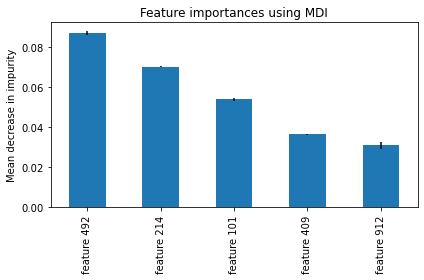

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
topk_forest_importances.plot.bar(yerr=std[:k], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
new_colnames = topk_forest_importances.index.to_list()

In [ ]:
new_colnames

['feature 492', 'feature 214', 'feature 101', 'feature 409', 'feature 912']

In [ ]:
new_colnames = [18, 325, 287, 61, 312]

In [ ]:
def df_data_new2():
    dat = pd.DataFrame(columns = range(1))
    for i in new_colnames:
        dat = pd.concat([dat, extract_df_abs_data.iloc[ :,i]], axis = 1)
    return dat

In [ ]:
df_data_new2 = df_data_new2()

In [ ]:
del df_data_new2[0]
df_data_new2 #feature extraction 성공 !!!

,withheld,xfct,xbt,wnsns,xenon
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
49441,0.0,0.0,0.0,0.0,0.0
49442,0.0,0.0,0.0,0.0,0.0
49443,0.0,0.0,0.0,0.0,0.0
49444,0.0,0.0,0.0,0.0,0.0


In [ ]:
#save df_abs to txt file in directory_location
df_new_array = df_data_new2.to_numpy()
np.savetxt(directory_location + 'df_data_new2.txt', df_new_array, fmt = '%s', encoding = 'UTF-8')

Decision Tree, rule extraction from sampled & feature extracted dataset

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X = df_data_new2
y = control_treatment_list
clf = DecisionTreeClassifier(max_depth = 3, random_state = 1234)
model = clf.fit(X,y)

In [ ]:
df_data_new2.shape

(49446, 5)

In [ ]:
y = np.array(y)
y

array(['0', '0', '0', ..., '1', '1', '1'], dtype='<U1')

In [ ]:
ddn_array = np.array(df_data_new2)
ddn_array

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
feature_names = ['withheld', 'xfct', 'xbt', 'wnsns', 'xenon']
feature_names

['withheld', 'xfct', 'xbt', 'wnsns', 'xenon']

In [ ]:
data_whole = {'data' : ddn_array, 'feature_names' : feature_names, 'target' : y}
data_whole

{'data': array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=float32),
 'feature_names': ['withheld', 'xfct', 'xbt', 'wnsns', 'xenon'],
 'target': array(['0', '0', '0', ..., '1', '1', '1'], dtype='<U1')}

In [ ]:
#built-in text representation
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_4 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 0
|   |--- feature_0 >  0.50
|   |   |--- class: 0
|--- feature_4 >  0.50
|   |--- class: 1



In [ ]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [ ]:
data_whole

{'data': array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=float32),
 'feature_names': ['withheld', 'xfct', 'xbt', 'wnsns', 'xenon'],
 'target': array(['0', '0', '0', ..., '1', '1', '1'], dtype='<U1')}

In [ ]:
data_whole['feature_names']

['withheld', 'xfct', 'xbt', 'wnsns', 'xenon']

In [ ]:
# human-friendly rules
rules = get_rules(clf, data_whole['feature_names'], data_whole['target'])
for r in rules:
    print(r)

if (xenon <= 0.5) and (withheld <= 0.5) and (xbt <= 0.5) then class: 0 (proba: 53.52%) | based on 49,420 samples
if (xenon > 0.5) then class: 0 (proba: 75.0%) | based on 24 samples
if (xenon <= 0.5) and (withheld > 0.5) then class: 0 (proba: 100.0%) | based on 1 samples
if (xenon <= 0.5) and (withheld <= 0.5) and (xbt > 0.5) then class: 0 (proba: 100.0%) | based on 1 samples


Comparison of performances on partial classifiers on 
original data (df_abs) vs. feature extracted data (df_data_new2)

In [ ]:
df_abs_csv = pd.read_csv(directory_location + '/df_abs.txt', sep = '\n', header = None)

In [ ]:
df_abs_csv

,0
0,0 Cracking process is a very important process...
1,0 Swietenia mahagoni (Mahogany) is a tradition...
2,0 Low-density polyethylene (LDPE) is one of th...
3,0 Understanding the influence of operating par...
4,0 A solution model consisted of two different ...
...,...
49441,1 One of the main problems with glaucoma throu...
49442,1 Primary care physicians must conduct a stagg...
49443,1 Since optical coherence tomography (OCT) is ...
49444,1 Modeling the propagation of coherent polariz...


In [ ]:
df_abs_csv = df_abs_csv[0]

In [ ]:
df_abs_csv

0        0 Cracking process is a very important process...
1        0 Swietenia mahagoni (Mahogany) is a tradition...
2        0 Low-density polyethylene (LDPE) is one of th...
3        0 Understanding the influence of operating par...
4        0 A solution model consisted of two different ...
                               ...                        
49441    1 One of the main problems with glaucoma throu...
49442    1 Primary care physicians must conduct a stagg...
49443    1 Since optical coherence tomography (OCT) is ...
49444    1 Modeling the propagation of coherent polariz...
49445    1 Graph-based methods for retinal layer segmen...
Name: 0, Length: 49446, dtype: object

In [ ]:
#m = [lemmatizer.lemmatize(list_num) for list_num in df_abs_csv]
#m = [stemmer.stem(list_num) for list_num in df_abs_csv]

In [ ]:
#m[0] #lemmatized and stemmed

'0 cracking process is a very important process that converts low value products into high value products such as conversion of naphtha into ethylene and propylene. the process is nonlinear with extensive reaction network. thus, nonlinear technique such as artificial neural network is explored to develop the model of the system. the paper will review and discuss the research works done on the technique in modelling cracking process using artificial neural network starting from early 1990s until recent development in 2015. timeline is provided to show progression of work done throughout the years, the main issues addressed, and the proposed techniques for each. in the next section, the main objective of each work and each techniques explored by previous researchers is discussed in more detail. a table that summarizes previous works is provided to show common works done throughout the years. lastly, potential gap for future works in the area is highlighted. © published under licence by i

In [ ]:
def stream_documents(df_abs_csv):
    global m
    shortword = re.compile(r'\W*\b\w{1,2}\b')
    for doc_num in range(len(df_abs_csv)):
        m = re.search(r'(\d)\s(.+)', df_abs_csv[doc_num])
        cls, body = m.group(1), m.group(2)
        shortword = re.compile(r'\W*\b\w{1,2}\b')
        body = shortword.sub("", body)
        body = body.replace(";", " ")
        doc = {'cls': cls, 'body': body}
        yield doc

In [ ]:
stream_documents(df_abs_csv)

<generator object stream_documents at 0x0000021432C03C10>

In [ ]:
data_stream = stream_documents(df_abs_csv)
all_classes = np.array([0,1])
pos_class = '1'

In [ ]:
#generate minibatch
def get_minibatch(doc_iter, size, pos_class=pos_class):
    data = [(doc['body'], pos_class not in doc['cls']) 
            for doc in itertools.islice(doc_iter, size)
           if doc['cls']]
    if not len(data):
        return np.asarray([], dtype=int), np.asarray([], dtype=int)
    X_text, y = zip(*data)
    return X_text, np.asarray(y, dtype=int)

def iter_minibatches(doc_iter, minibatch_size):
    """Generator of minibatches."""
    X_text, y = get_minibatch(doc_iter, minibatch_size)
    while len(X_text):
        yield X_text, y
        X_text, y = get_minibatch(doc_iter, minibatch_size)

In [ ]:
# test data statistics
#vectorizer = HashingVectorizer()
test_stats = {'n_test': 0, 'n_test_pos': 0}

# First we hold out a number of examples to estimate accuracy
n_test_documents = 100
tick = time.time()
X_test_text, y_test = get_minibatch(data_stream, 100)
parsing_time = time.time() - tick
tick = time.time()
X_test = tv_binary.transform(X_test_text)
vectorizing_time = time.time() - tick
test_stats['n_test'] += len(y_test)
test_stats['n_test_pos'] += sum(y_test)
print("Test set is %d documents (%d positive)" % (len(y_test), sum(y_test)))

Test set is 100 documents (100 positive)


In [ ]:
y_test #

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB
partial_fit_classifiers = {
    'SGD': SGDClassifier(max_iter=5),
    'Perceptron': Perceptron(),
    'NB Multinomial': MultinomialNB(alpha=0.01),
    'Passive-Aggressive': PassiveAggressiveClassifier(),
}

In [ ]:
def progress(cls_name, stats):
    """Report progress information, return a string."""
    duration = time.time() - stats['t0']
    s = "%20s classifier : \t" % cls_name
    s += "%(n_train)6d train docs (%(n_train_pos)6d positive) " % stats
    s += "%(n_test)6d test docs (%(n_test_pos)6d positive) " % test_stats
    s += "accuracy: %(accuracy).3f " % stats
    s += "in %.2fs (%5d docs/s)" % (duration, stats['n_train'] / duration)
    return s


cls_stats = {}

for cls_name in partial_fit_classifiers:
    stats = {'n_train': 0, 'n_train_pos': 0,
             'accuracy': 0.0, 'accuracy_history': [(0, 0)], 't0': time.time(),
             'runtime_history': [(0, 0)], 'total_fit_time': 0.0}
    cls_stats[cls_name] = stats

get_minibatch(data_stream, n_test_documents)
# Discard test set

minibatch_size = 100

# Create the data_stream that parses Reuters SGML files and iterates on
# documents as a stream.
minibatch_iterators = iter_minibatches(data_stream, minibatch_size)
total_vect_time = 0.0

# Main loop : iterate on mini-batches of examples
for i, (X_train_text, y_train) in enumerate(minibatch_iterators):

    tick = time.time()
    X_train = tv_binary.transform(X_train_text) #vectorized
    total_vect_time += time.time() - tick

    for cls_name, cls in partial_fit_classifiers.items():
        tick = time.time()
        # update estimator with examples in the current mini-batch
        cls.partial_fit(X_train, y_train, classes=all_classes)

        # accumulate test accuracy stats
        cls_stats[cls_name]['total_fit_time'] += time.time() - tick
        cls_stats[cls_name]['n_train'] += X_train.shape[0]
        cls_stats[cls_name]['n_train_pos'] += sum(y_train)
        tick = time.time()
        cls_stats[cls_name]['accuracy'] = cls.score(X_test, y_test)
        cls_stats[cls_name]['prediction_time'] = time.time() - tick
        acc_history = (cls_stats[cls_name]['accuracy'],
                       cls_stats[cls_name]['n_train'])
        cls_stats[cls_name]['accuracy_history'].append(acc_history)
        run_history = (cls_stats[cls_name]['accuracy'],
                       total_vect_time + cls_stats[cls_name]['total_fit_time'])
        cls_stats[cls_name]['runtime_history'].append(run_history)

        if i % 3 == 0:
            print(progress(cls_name, cls_stats[cls_name]))
    if i % 3 == 0:
        print('\n')

                 SGD classifier : 	   100 train docs (   100 positive)    100 test docs (   100 positive) accuracy: 1.000 in 0.09s ( 1127 docs/s)
          Perceptron classifier : 	   100 train docs (   100 positive)    100 test docs (   100 positive) accuracy: 1.000 in 0.09s ( 1090 docs/s)
      NB Multinomial classifier : 	   100 train docs (   100 positive)    100 test docs (   100 positive) accuracy: 1.000 in 0.10s ( 1023 docs/s)
  Passive-Aggressive classifier : 	   100 train docs (   100 positive)    100 test docs (   100 positive) accuracy: 1.000 in 0.10s (  993 docs/s)


                 SGD classifier : 	   400 train docs (   400 positive)    100 test docs (   100 positive) accuracy: 1.000 in 0.26s ( 1560 docs/s)
          Perceptron classifier : 	   400 train docs (   400 positive)    100 test docs (   100 positive) accuracy: 1.000 in 0.26s ( 1548 docs/s)
      NB Multinomial classifier : 	   400 train docs (   400 positive)    100 test docs (   100 positive) accuracy: 1.000 

                 SGD classifier : 	  4300 train docs (  4300 positive)    100 test docs (   100 positive) accuracy: 1.000 in 1.94s ( 2219 docs/s)
          Perceptron classifier : 	  4300 train docs (  4300 positive)    100 test docs (   100 positive) accuracy: 1.000 in 1.94s ( 2215 docs/s)
      NB Multinomial classifier : 	  4300 train docs (  4300 positive)    100 test docs (   100 positive) accuracy: 1.000 in 1.94s ( 2211 docs/s)
  Passive-Aggressive classifier : 	  4300 train docs (  4300 positive)    100 test docs (   100 positive) accuracy: 1.000 in 1.95s ( 2208 docs/s)


                 SGD classifier : 	  4600 train docs (  4600 positive)    100 test docs (   100 positive) accuracy: 1.000 in 2.05s ( 2242 docs/s)
          Perceptron classifier : 	  4600 train docs (  4600 positive)    100 test docs (   100 positive) accuracy: 1.000 in 2.05s ( 2240 docs/s)
      NB Multinomial classifier : 	  4600 train docs (  4600 positive)    100 test docs (   100 positive) accuracy: 1.000 

                 SGD classifier : 	  8500 train docs (  8500 positive)    100 test docs (   100 positive) accuracy: 1.000 in 3.58s ( 2375 docs/s)
          Perceptron classifier : 	  8500 train docs (  8500 positive)    100 test docs (   100 positive) accuracy: 1.000 in 3.58s ( 2374 docs/s)
      NB Multinomial classifier : 	  8500 train docs (  8500 positive)    100 test docs (   100 positive) accuracy: 1.000 in 3.58s ( 2372 docs/s)
  Passive-Aggressive classifier : 	  8500 train docs (  8500 positive)    100 test docs (   100 positive) accuracy: 1.000 in 3.59s ( 2370 docs/s)


                 SGD classifier : 	  8800 train docs (  8800 positive)    100 test docs (   100 positive) accuracy: 1.000 in 3.69s ( 2384 docs/s)
          Perceptron classifier : 	  8800 train docs (  8800 positive)    100 test docs (   100 positive) accuracy: 1.000 in 3.69s ( 2382 docs/s)
      NB Multinomial classifier : 	  8800 train docs (  8800 positive)    100 test docs (   100 positive) accuracy: 1.000 

                 SGD classifier : 	 12700 train docs ( 12700 positive)    100 test docs (   100 positive) accuracy: 1.000 in 5.20s ( 2443 docs/s)
          Perceptron classifier : 	 12700 train docs ( 12700 positive)    100 test docs (   100 positive) accuracy: 1.000 in 5.20s ( 2442 docs/s)
      NB Multinomial classifier : 	 12700 train docs ( 12700 positive)    100 test docs (   100 positive) accuracy: 1.000 in 5.20s ( 2440 docs/s)
  Passive-Aggressive classifier : 	 12700 train docs ( 12700 positive)    100 test docs (   100 positive) accuracy: 1.000 in 5.21s ( 2439 docs/s)


                 SGD classifier : 	 13000 train docs ( 13000 positive)    100 test docs (   100 positive) accuracy: 1.000 in 5.33s ( 2439 docs/s)
          Perceptron classifier : 	 13000 train docs ( 13000 positive)    100 test docs (   100 positive) accuracy: 1.000 in 5.33s ( 2438 docs/s)
      NB Multinomial classifier : 	 13000 train docs ( 13000 positive)    100 test docs (   100 positive) accuracy: 1.000 

          Perceptron classifier : 	 16900 train docs ( 16900 positive)    100 test docs (   100 positive) accuracy: 1.000 in 6.95s ( 2430 docs/s)
      NB Multinomial classifier : 	 16900 train docs ( 16900 positive)    100 test docs (   100 positive) accuracy: 1.000 in 6.96s ( 2428 docs/s)
  Passive-Aggressive classifier : 	 16900 train docs ( 16900 positive)    100 test docs (   100 positive) accuracy: 1.000 in 6.96s ( 2428 docs/s)


                 SGD classifier : 	 17200 train docs ( 17200 positive)    100 test docs (   100 positive) accuracy: 1.000 in 7.10s ( 2421 docs/s)
          Perceptron classifier : 	 17200 train docs ( 17200 positive)    100 test docs (   100 positive) accuracy: 1.000 in 7.11s ( 2420 docs/s)
      NB Multinomial classifier : 	 17200 train docs ( 17200 positive)    100 test docs (   100 positive) accuracy: 1.000 in 7.11s ( 2418 docs/s)
  Passive-Aggressive classifier : 	 17200 train docs ( 17200 positive)    100 test docs (   100 positive) accuracy: 1.000 

                 SGD classifier : 	 21700 train docs ( 21700 positive)    100 test docs (   100 positive) accuracy: 1.000 in 9.15s ( 2371 docs/s)
          Perceptron classifier : 	 21700 train docs ( 21700 positive)    100 test docs (   100 positive) accuracy: 1.000 in 9.15s ( 2370 docs/s)
      NB Multinomial classifier : 	 21700 train docs ( 21700 positive)    100 test docs (   100 positive) accuracy: 1.000 in 9.16s ( 2370 docs/s)
  Passive-Aggressive classifier : 	 21700 train docs ( 21700 positive)    100 test docs (   100 positive) accuracy: 1.000 in 9.16s ( 2369 docs/s)


                 SGD classifier : 	 22000 train docs ( 22000 positive)    100 test docs (   100 positive) accuracy: 1.000 in 9.26s ( 2376 docs/s)
          Perceptron classifier : 	 22000 train docs ( 22000 positive)    100 test docs (   100 positive) accuracy: 1.000 in 9.26s ( 2376 docs/s)
      NB Multinomial classifier : 	 22000 train docs ( 22000 positive)    100 test docs (   100 positive) accuracy: 1.000 

                 SGD classifier : 	 25900 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.490 in 11.07s ( 2339 docs/s)
          Perceptron classifier : 	 25900 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.630 in 11.07s ( 2339 docs/s)
      NB Multinomial classifier : 	 25900 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.980 in 11.08s ( 2338 docs/s)
  Passive-Aggressive classifier : 	 25900 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.950 in 11.08s ( 2338 docs/s)


                 SGD classifier : 	 26200 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.490 in 11.21s ( 2337 docs/s)
          Perceptron classifier : 	 26200 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.370 in 11.21s ( 2337 docs/s)
      NB Multinomial classifier : 	 26200 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 

                 SGD classifier : 	 30100 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.340 in 13.06s ( 2304 docs/s)
          Perceptron classifier : 	 30100 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.370 in 13.06s ( 2304 docs/s)
      NB Multinomial classifier : 	 30100 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.980 in 13.07s ( 2303 docs/s)
  Passive-Aggressive classifier : 	 30100 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.910 in 13.07s ( 2303 docs/s)


                 SGD classifier : 	 30400 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.340 in 13.18s ( 2305 docs/s)
          Perceptron classifier : 	 30400 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.370 in 13.18s ( 2305 docs/s)
      NB Multinomial classifier : 	 30400 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 

                 SGD classifier : 	 34600 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.080 in 15.32s ( 2259 docs/s)
          Perceptron classifier : 	 34600 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.190 in 15.32s ( 2258 docs/s)
      NB Multinomial classifier : 	 34600 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.980 in 15.32s ( 2258 docs/s)
  Passive-Aggressive classifier : 	 34600 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.270 in 15.32s ( 2257 docs/s)


                 SGD classifier : 	 34900 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.080 in 15.46s ( 2257 docs/s)
          Perceptron classifier : 	 34900 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.190 in 15.46s ( 2256 docs/s)
      NB Multinomial classifier : 	 34900 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 

                 SGD classifier : 	 39100 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.060 in 17.45s ( 2240 docs/s)
          Perceptron classifier : 	 39100 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.180 in 17.45s ( 2240 docs/s)
      NB Multinomial classifier : 	 39100 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.980 in 17.46s ( 2239 docs/s)
  Passive-Aggressive classifier : 	 39100 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.140 in 17.46s ( 2239 docs/s)


                 SGD classifier : 	 39400 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.050 in 17.60s ( 2239 docs/s)
          Perceptron classifier : 	 39400 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.180 in 17.60s ( 2238 docs/s)
      NB Multinomial classifier : 	 39400 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 

                 SGD classifier : 	 43300 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.020 in 19.30s ( 2243 docs/s)
          Perceptron classifier : 	 43300 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.100 in 19.30s ( 2243 docs/s)
      NB Multinomial classifier : 	 43300 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.980 in 19.31s ( 2242 docs/s)
  Passive-Aggressive classifier : 	 43300 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.080 in 19.31s ( 2242 docs/s)


                 SGD classifier : 	 43600 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.020 in 19.44s ( 2242 docs/s)
          Perceptron classifier : 	 43600 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.100 in 19.44s ( 2242 docs/s)
      NB Multinomial classifier : 	 43600 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 

                 SGD classifier : 	 47800 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.020 in 21.57s ( 2216 docs/s)
          Perceptron classifier : 	 47800 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.100 in 21.57s ( 2215 docs/s)
      NB Multinomial classifier : 	 47800 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.980 in 21.58s ( 2215 docs/s)
  Passive-Aggressive classifier : 	 47800 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.050 in 21.58s ( 2214 docs/s)


                 SGD classifier : 	 48100 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.020 in 21.74s ( 2212 docs/s)
          Perceptron classifier : 	 48100 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 0.100 in 21.74s ( 2212 docs/s)
      NB Multinomial classifier : 	 48100 train docs ( 22778 positive)    100 test docs (   100 positive) accuracy: 

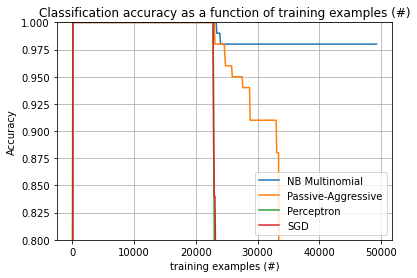

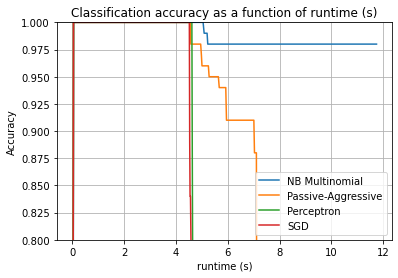

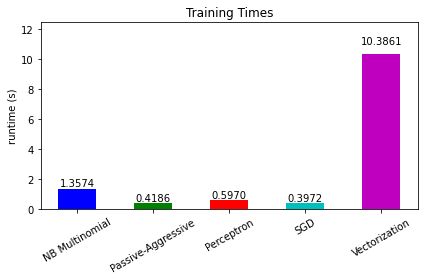

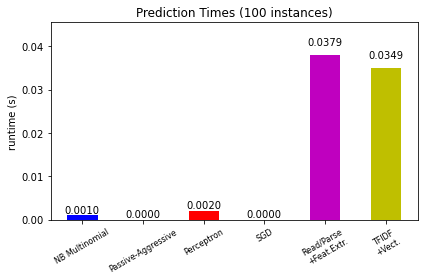

In [ ]:
from matplotlib import rcParams
def plot_accuracy(x, y, x_legend):
    """Plot accuracy as a function of x."""
    x = np.array(x)
    y = np.array(y)
    plt.title('Classification accuracy as a function of %s' % x_legend)
    plt.xlabel('%s' % x_legend)
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.plot(x, y)


rcParams['legend.fontsize'] = 10
cls_names = list(sorted(cls_stats.keys()))

# Plot accuracy evolution
plt.figure()
for _, stats in sorted(cls_stats.items()):
    # Plot accuracy evolution with #examples
    accuracy, n_examples = zip(*stats['accuracy_history'])
    plot_accuracy(n_examples, accuracy, "training examples (#)")
    ax = plt.gca()
    ax.set_ylim((0.8, 1))
plt.legend(cls_names, loc='best')

plt.figure()
for _, stats in sorted(cls_stats.items()):
    # Plot accuracy evolution with runtime
    accuracy, runtime = zip(*stats['runtime_history'])
    plot_accuracy(runtime, accuracy, 'runtime (s)')
    ax = plt.gca()
    ax.set_ylim((0.8, 1))
plt.legend(cls_names, loc='best')

# Plot fitting times
plt.figure()
fig = plt.gcf()
cls_runtime = [stats['total_fit_time']
               for cls_name, stats in sorted(cls_stats.items())]

cls_runtime.append(total_vect_time)
cls_names.append('Vectorization')
bar_colors = ['b', 'g', 'r', 'c', 'm', 'y']

ax = plt.subplot(111)
rectangles = plt.bar(range(len(cls_names)), cls_runtime, width=0.5,
                     color=bar_colors)

ax.set_xticks(np.linspace(0, len(cls_names) - 1, len(cls_names)))
ax.set_xticklabels(cls_names, fontsize=10)
ymax = max(cls_runtime) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel('runtime (s)')
ax.set_title('Training Times')


def autolabel(rectangles):
    """attach some text vi autolabel on rectangles."""
    for rect in rectangles:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2.,
                1.05 * height, '%.4f' % height,
                ha='center', va='bottom')
        plt.setp(plt.xticks()[1], rotation=30)


autolabel(rectangles)
plt.tight_layout()
plt.show()

# Plot prediction times
plt.figure()
cls_runtime = []
cls_names = list(sorted(cls_stats.keys()))
for cls_name, stats in sorted(cls_stats.items()):
    cls_runtime.append(stats['prediction_time'])
cls_runtime.append(parsing_time)
cls_names.append('Read/Parse\n+Feat.Extr.')
cls_runtime.append(vectorizing_time)
cls_names.append('TFIDF\n+Vect.')

ax = plt.subplot(111)
rectangles = plt.bar(range(len(cls_names)), cls_runtime, width=0.5,
                     color=bar_colors)

ax.set_xticks(np.linspace(0, len(cls_names) - 1, len(cls_names)))
ax.set_xticklabels(cls_names, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(cls_runtime) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel('runtime (s)')
ax.set_title('Prediction Times (%d instances)' % n_test_documents)
autolabel(rectangles)
plt.tight_layout()
plt.show()

Partial fit classifier models on feature extracteds dataset (df_abs)

In [ ]:
df_data_new2 = pd.read_csv(directory_location + '/df_data_new2.txt', sep = '\n', header = None)

In [ ]:
df_data_new2

,0
0,0.0 0.0 0.0 0.0 0.0
1,0.0 0.0 0.0 0.0 0.0
2,0.0 0.0 0.0 0.0 0.0
3,0.0 0.0 0.0 0.0 0.0
4,0.0 0.0 0.0 0.0 0.0
...,...
49441,0.0 0.0 0.0 0.0 0.0
49442,0.0 0.0 0.0 0.0 0.0
49443,0.0 0.0 0.0 0.0 0.0
49444,0.0 0.0 0.0 0.0 0.0


In [ ]:
df_data_new2 = df_data_new2[0]

In [ ]:
df_data_new2

0        0.0 0.0 0.0 0.0 0.0
1        0.0 0.0 0.0 0.0 0.0
2        0.0 0.0 0.0 0.0 0.0
3        0.0 0.0 0.0 0.0 0.0
4        0.0 0.0 0.0 0.0 0.0
                ...         
49441    0.0 0.0 0.0 0.0 0.0
49442    0.0 0.0 0.0 0.0 0.0
49443    0.0 0.0 0.0 0.0 0.0
49444    0.0 0.0 0.0 0.0 0.0
49445    0.0 0.0 0.0 0.0 0.0
Name: 0, Length: 49446, dtype: object

In [ ]:
#m = [lemmatizer.lemmatize(list_num) for list_num in df_abs_csv]
#m = [stemmer.stem(list_num) for list_num in df_data_new2]

In [ ]:
#m[0] #lemmatized and stemmed

'0.0 0.0 0.0 0.0 0.0'

In [ ]:
def stream_documents(df_data_new2):
    global m
    shortword = re.compile(r'\W*\b\w{1,2}\b')
    for doc_num in range(len(df_data_new2)):
        m = re.search(r'(\d)\s(.+)', df_data_new2[doc_num])
        cls, body = m.group(1), m.group(2)
        shortword = re.compile(r'\W*\b\w{1,2}\b')
        body = shortword.sub("", body)
        body = body.replace(";", " ")
        doc = {'cls': cls, 'body': body}
        yield doc

In [ ]:
stream_documents(df_data_new2)

<generator object stream_documents at 0x0000021432B21F20>

In [ ]:
data_stream = stream_documents(df_data_new2)
all_classes = np.array([0,1])
pos_class = '1'

In [ ]:
#generate minibatch
def get_minibatch(doc_iter, size, pos_class=pos_class):
    data = [(doc['body'], pos_class not in doc['cls']) 
            for doc in itertools.islice(doc_iter, size)
           if doc['cls']]
    if not len(data):
        return np.asarray([], dtype=int), np.asarray([], dtype=int)
    X_text, y = zip(*data)
    return X_text, np.asarray(y, dtype=int)

def iter_minibatches(doc_iter, minibatch_size):
    """Generator of minibatches."""
    X_text, y = get_minibatch(doc_iter, minibatch_size)
    while len(X_text):
        yield X_text, y
        X_text, y = get_minibatch(doc_iter, minibatch_size)

In [ ]:
# test data statistics
#vectorizer = HashingVectorizer()
test_stats = {'n_test': 0, 'n_test_pos': 0}

# First we hold out a number of examples to estimate accuracy
n_test_documents = 100
tick = time.time()
X_test_text, y_test = get_minibatch(data_stream, 100)
parsing_time = time.time() - tick
tick = time.time()
X_test = tv_binary.transform(X_test_text)
vectorizing_time = time.time() - tick
test_stats['n_test'] += len(y_test)
test_stats['n_test_pos'] += sum(y_test)
print("Test set is %d documents (%d positive)" % (len(y_test), sum(y_test)))

Test set is 100 documents (100 positive)


In [ ]:
y_test #

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB
partial_fit_classifiers = {
    'SGD': SGDClassifier(max_iter=5),
    'Perceptron': Perceptron(),
    'NB Multinomial': MultinomialNB(alpha=0.01),
    'Passive-Aggressive': PassiveAggressiveClassifier(),
}

In [ ]:
def progress(cls_name, stats):
    """Report progress information, return a string."""
    duration = time.time() - stats['t0']
    s = "%20s classifier : \t" % cls_name
    s += "%(n_train)6d train docs (%(n_train_pos)6d positive) " % stats
    s += "%(n_test)6d test docs (%(n_test_pos)6d positive) " % test_stats
    s += "accuracy: %(accuracy).3f " % stats
    s += "in %.2fs (%5d docs/s)" % (duration, stats['n_train'] / duration)
    return s


cls_stats = {}

for cls_name in partial_fit_classifiers:
    stats = {'n_train': 0, 'n_train_pos': 0,
             'accuracy': 0.0, 'accuracy_history': [(0, 0)], 't0': time.time(),
             'runtime_history': [(0, 0)], 'total_fit_time': 0.0}
    cls_stats[cls_name] = stats

get_minibatch(data_stream, n_test_documents)
# Discard test set

minibatch_size = 100

# Create the data_stream that parses Reuters SGML files and iterates on
# documents as a stream.
minibatch_iterators = iter_minibatches(data_stream, minibatch_size)
total_vect_time = 0.0

# Main loop : iterate on mini-batches of examples
for i, (X_train_text, y_train) in enumerate(minibatch_iterators):

    tick = time.time()
    X_train = tv_binary.transform(X_train_text) #vectorized
    total_vect_time += time.time() - tick

    for cls_name, cls in partial_fit_classifiers.items():
        tick = time.time()
        # update estimator with examples in the current mini-batch
        cls.partial_fit(X_train, y_train, classes=all_classes)

        # accumulate test accuracy stats
        cls_stats[cls_name]['total_fit_time'] += time.time() - tick
        cls_stats[cls_name]['n_train'] += X_train.shape[0]
        cls_stats[cls_name]['n_train_pos'] += sum(y_train)
        tick = time.time()
        cls_stats[cls_name]['accuracy'] = cls.score(X_test, y_test)
        cls_stats[cls_name]['prediction_time'] = time.time() - tick
        acc_history = (cls_stats[cls_name]['accuracy'],
                       cls_stats[cls_name]['n_train'])
        cls_stats[cls_name]['accuracy_history'].append(acc_history)
        run_history = (cls_stats[cls_name]['accuracy'],
                       total_vect_time + cls_stats[cls_name]['total_fit_time'])
        cls_stats[cls_name]['runtime_history'].append(run_history)

        if i % 3 == 0:
            print(progress(cls_name, cls_stats[cls_name]))
    if i % 3 == 0:
        print('\n')

                 SGD classifier : 	   100 train docs (   100 positive)    100 test docs (   100 positive) accuracy: 1.000 in 0.01s ( 9115 docs/s)
          Perceptron classifier : 	   100 train docs (   100 positive)    100 test docs (   100 positive) accuracy: 1.000 in 0.02s ( 6268 docs/s)
      NB Multinomial classifier : 	   100 train docs (   100 positive)    100 test docs (   100 positive) accuracy: 1.000 in 0.02s ( 4009 docs/s)
  Passive-Aggressive classifier : 	   100 train docs (   100 positive)    100 test docs (   100 positive) accuracy: 0.000 in 0.03s ( 3714 docs/s)


                 SGD classifier : 	   400 train docs (   400 positive)    100 test docs (   100 positive) accuracy: 1.000 in 0.07s ( 5494 docs/s)
          Perceptron classifier : 	   400 train docs (   400 positive)    100 test docs (   100 positive) accuracy: 1.000 in 0.08s ( 5277 docs/s)
      NB Multinomial classifier : 	   400 train docs (   400 positive)    100 test docs (   100 positive) accuracy: 1.000 

          Perceptron classifier : 	  4300 train docs (  4300 positive)    100 test docs (   100 positive) accuracy: 1.000 in 0.83s ( 5194 docs/s)
      NB Multinomial classifier : 	  4300 train docs (  4300 positive)    100 test docs (   100 positive) accuracy: 1.000 in 0.84s ( 5145 docs/s)
  Passive-Aggressive classifier : 	  4300 train docs (  4300 positive)    100 test docs (   100 positive) accuracy: 0.000 in 0.84s ( 5126 docs/s)


                 SGD classifier : 	  4600 train docs (  4600 positive)    100 test docs (   100 positive) accuracy: 1.000 in 0.88s ( 5223 docs/s)
          Perceptron classifier : 	  4600 train docs (  4600 positive)    100 test docs (   100 positive) accuracy: 1.000 in 0.88s ( 5199 docs/s)
      NB Multinomial classifier : 	  4600 train docs (  4600 positive)    100 test docs (   100 positive) accuracy: 1.000 in 0.89s ( 5164 docs/s)
  Passive-Aggressive classifier : 	  4600 train docs (  4600 positive)    100 test docs (   100 positive) accuracy: 0.000 

  Passive-Aggressive classifier : 	  8800 train docs (  8800 positive)    100 test docs (   100 positive) accuracy: 0.000 in 1.67s ( 5258 docs/s)


                 SGD classifier : 	  9100 train docs (  9100 positive)    100 test docs (   100 positive) accuracy: 1.000 in 1.71s ( 5320 docs/s)
          Perceptron classifier : 	  9100 train docs (  9100 positive)    100 test docs (   100 positive) accuracy: 1.000 in 1.71s ( 5307 docs/s)
      NB Multinomial classifier : 	  9100 train docs (  9100 positive)    100 test docs (   100 positive) accuracy: 1.000 in 1.72s ( 5286 docs/s)
  Passive-Aggressive classifier : 	  9100 train docs (  9100 positive)    100 test docs (   100 positive) accuracy: 0.000 in 1.72s ( 5280 docs/s)


                 SGD classifier : 	  9400 train docs (  9400 positive)    100 test docs (   100 positive) accuracy: 1.000 in 1.76s ( 5337 docs/s)
          Perceptron classifier : 	  9400 train docs (  9400 positive)    100 test docs (   100 positive) accuracy: 1.00

          Perceptron classifier : 	 13300 train docs ( 13300 positive)    100 test docs (   100 positive) accuracy: 1.000 in 2.44s ( 5452 docs/s)
      NB Multinomial classifier : 	 13300 train docs ( 13300 positive)    100 test docs (   100 positive) accuracy: 1.000 in 2.45s ( 5434 docs/s)
  Passive-Aggressive classifier : 	 13300 train docs ( 13300 positive)    100 test docs (   100 positive) accuracy: 0.000 in 2.45s ( 5429 docs/s)


                 SGD classifier : 	 13600 train docs ( 13600 positive)    100 test docs (   100 positive) accuracy: 1.000 in 2.49s ( 5456 docs/s)
          Perceptron classifier : 	 13600 train docs ( 13600 positive)    100 test docs (   100 positive) accuracy: 1.000 in 2.50s ( 5448 docs/s)
      NB Multinomial classifier : 	 13600 train docs ( 13600 positive)    100 test docs (   100 positive) accuracy: 1.000 in 2.50s ( 5430 docs/s)
  Passive-Aggressive classifier : 	 13600 train docs ( 13600 positive)    100 test docs (   100 positive) accuracy: 0.000 

          Perceptron classifier : 	 17500 train docs ( 17500 positive)    100 test docs (   100 positive) accuracy: 1.000 in 3.01s ( 5804 docs/s)
      NB Multinomial classifier : 	 17500 train docs ( 17500 positive)    100 test docs (   100 positive) accuracy: 1.000 in 3.02s ( 5794 docs/s)
  Passive-Aggressive classifier : 	 17500 train docs ( 17500 positive)    100 test docs (   100 positive) accuracy: 0.000 in 3.02s ( 5791 docs/s)


                 SGD classifier : 	 17800 train docs ( 17800 positive)    100 test docs (   100 positive) accuracy: 1.000 in 3.04s ( 5851 docs/s)
          Perceptron classifier : 	 17800 train docs ( 17800 positive)    100 test docs (   100 positive) accuracy: 1.000 in 3.04s ( 5845 docs/s)
      NB Multinomial classifier : 	 17800 train docs ( 17800 positive)    100 test docs (   100 positive) accuracy: 1.000 in 3.05s ( 5840 docs/s)
  Passive-Aggressive classifier : 	 17800 train docs ( 17800 positive)    100 test docs (   100 positive) accuracy: 0.000 

          Perceptron classifier : 	 21700 train docs ( 21700 positive)    100 test docs (   100 positive) accuracy: 1.000 in 3.45s ( 6293 docs/s)
      NB Multinomial classifier : 	 21700 train docs ( 21700 positive)    100 test docs (   100 positive) accuracy: 1.000 in 3.45s ( 6283 docs/s)
  Passive-Aggressive classifier : 	 21700 train docs ( 21700 positive)    100 test docs (   100 positive) accuracy: 0.000 in 3.46s ( 6279 docs/s)


                 SGD classifier : 	 22000 train docs ( 22000 positive)    100 test docs (   100 positive) accuracy: 1.000 in 3.49s ( 6302 docs/s)
          Perceptron classifier : 	 22000 train docs ( 22000 positive)    100 test docs (   100 positive) accuracy: 1.000 in 3.49s ( 6297 docs/s)
      NB Multinomial classifier : 	 22000 train docs ( 22000 positive)    100 test docs (   100 positive) accuracy: 1.000 in 3.50s ( 6288 docs/s)
  Passive-Aggressive classifier : 	 22000 train docs ( 22000 positive)    100 test docs (   100 positive) accuracy: 0.000 

          Perceptron classifier : 	 26500 train docs ( 26500 positive)    100 test docs (   100 positive) accuracy: 1.000 in 3.99s ( 6637 docs/s)
      NB Multinomial classifier : 	 26500 train docs ( 26500 positive)    100 test docs (   100 positive) accuracy: 1.000 in 4.00s ( 6629 docs/s)
  Passive-Aggressive classifier : 	 26500 train docs ( 26500 positive)    100 test docs (   100 positive) accuracy: 0.000 in 4.00s ( 6626 docs/s)


                 SGD classifier : 	 26800 train docs ( 26800 positive)    100 test docs (   100 positive) accuracy: 1.000 in 4.03s ( 6654 docs/s)
          Perceptron classifier : 	 26800 train docs ( 26800 positive)    100 test docs (   100 positive) accuracy: 1.000 in 4.03s ( 6651 docs/s)
      NB Multinomial classifier : 	 26800 train docs ( 26800 positive)    100 test docs (   100 positive) accuracy: 1.000 in 4.04s ( 6641 docs/s)
  Passive-Aggressive classifier : 	 26800 train docs ( 26800 positive)    100 test docs (   100 positive) accuracy: 0.000 

                 SGD classifier : 	 31000 train docs ( 31000 positive)    100 test docs (   100 positive) accuracy: 1.000 in 4.43s ( 6997 docs/s)
          Perceptron classifier : 	 31000 train docs ( 31000 positive)    100 test docs (   100 positive) accuracy: 1.000 in 4.43s ( 6994 docs/s)
      NB Multinomial classifier : 	 31000 train docs ( 31000 positive)    100 test docs (   100 positive) accuracy: 1.000 in 4.44s ( 6986 docs/s)
  Passive-Aggressive classifier : 	 31000 train docs ( 31000 positive)    100 test docs (   100 positive) accuracy: 0.000 in 4.44s ( 6981 docs/s)


                 SGD classifier : 	 31300 train docs ( 31300 positive)    100 test docs (   100 positive) accuracy: 1.000 in 4.47s ( 7008 docs/s)
          Perceptron classifier : 	 31300 train docs ( 31300 positive)    100 test docs (   100 positive) accuracy: 1.000 in 4.47s ( 7003 docs/s)
      NB Multinomial classifier : 	 31300 train docs ( 31300 positive)    100 test docs (   100 positive) accuracy: 1.000 

  Passive-Aggressive classifier : 	 35800 train docs ( 35800 positive)    100 test docs (   100 positive) accuracy: 0.000 in 4.95s ( 7226 docs/s)


                 SGD classifier : 	 36100 train docs ( 36100 positive)    100 test docs (   100 positive) accuracy: 1.000 in 4.98s ( 7243 docs/s)
          Perceptron classifier : 	 36100 train docs ( 36100 positive)    100 test docs (   100 positive) accuracy: 1.000 in 4.99s ( 7239 docs/s)
      NB Multinomial classifier : 	 36100 train docs ( 36100 positive)    100 test docs (   100 positive) accuracy: 1.000 in 4.99s ( 7234 docs/s)
  Passive-Aggressive classifier : 	 36100 train docs ( 36100 positive)    100 test docs (   100 positive) accuracy: 0.000 in 4.99s ( 7232 docs/s)


                 SGD classifier : 	 36400 train docs ( 36400 positive)    100 test docs (   100 positive) accuracy: 1.000 in 5.02s ( 7250 docs/s)
          Perceptron classifier : 	 36400 train docs ( 36400 positive)    100 test docs (   100 positive) accuracy: 1.00

          Perceptron classifier : 	 41200 train docs ( 41200 positive)    100 test docs (   100 positive) accuracy: 1.000 in 5.52s ( 7467 docs/s)
      NB Multinomial classifier : 	 41200 train docs ( 41200 positive)    100 test docs (   100 positive) accuracy: 1.000 in 5.52s ( 7459 docs/s)
  Passive-Aggressive classifier : 	 41200 train docs ( 41200 positive)    100 test docs (   100 positive) accuracy: 0.000 in 5.53s ( 7456 docs/s)


                 SGD classifier : 	 41500 train docs ( 41500 positive)    100 test docs (   100 positive) accuracy: 1.000 in 5.55s ( 7477 docs/s)
          Perceptron classifier : 	 41500 train docs ( 41500 positive)    100 test docs (   100 positive) accuracy: 1.000 in 5.55s ( 7473 docs/s)
      NB Multinomial classifier : 	 41500 train docs ( 41500 positive)    100 test docs (   100 positive) accuracy: 1.000 in 5.56s ( 7467 docs/s)
  Passive-Aggressive classifier : 	 41500 train docs ( 41500 positive)    100 test docs (   100 positive) accuracy: 0.000 

  Passive-Aggressive classifier : 	 45400 train docs ( 45400 positive)    100 test docs (   100 positive) accuracy: 0.000 in 5.96s ( 7623 docs/s)


                 SGD classifier : 	 45700 train docs ( 45700 positive)    100 test docs (   100 positive) accuracy: 1.000 in 5.98s ( 7639 docs/s)
          Perceptron classifier : 	 45700 train docs ( 45700 positive)    100 test docs (   100 positive) accuracy: 1.000 in 5.98s ( 7637 docs/s)
      NB Multinomial classifier : 	 45700 train docs ( 45700 positive)    100 test docs (   100 positive) accuracy: 1.000 in 5.99s ( 7629 docs/s)
  Passive-Aggressive classifier : 	 45700 train docs ( 45700 positive)    100 test docs (   100 positive) accuracy: 0.000 in 5.99s ( 7626 docs/s)


                 SGD classifier : 	 46000 train docs ( 46000 positive)    100 test docs (   100 positive) accuracy: 1.000 in 6.01s ( 7647 docs/s)
          Perceptron classifier : 	 46000 train docs ( 46000 positive)    100 test docs (   100 positive) accuracy: 1.00

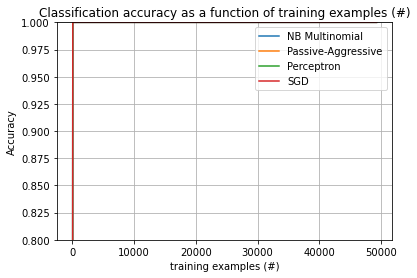

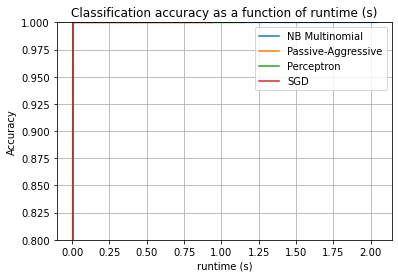

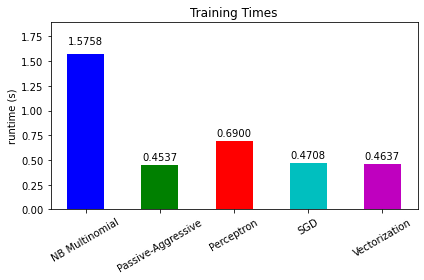

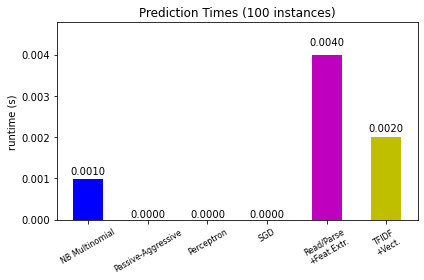

In [ ]:
from matplotlib import rcParams
def plot_accuracy(x, y, x_legend):
    """Plot accuracy as a function of x."""
    x = np.array(x)
    y = np.array(y)
    plt.title('Classification accuracy as a function of %s' % x_legend)
    plt.xlabel('%s' % x_legend)
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.plot(x, y)


rcParams['legend.fontsize'] = 10
cls_names = list(sorted(cls_stats.keys()))

# Plot accuracy evolution
plt.figure()
for _, stats in sorted(cls_stats.items()):
    # Plot accuracy evolution with #examples
    accuracy, n_examples = zip(*stats['accuracy_history'])
    plot_accuracy(n_examples, accuracy, "training examples (#)")
    ax = plt.gca()
    ax.set_ylim((0.8, 1))
plt.legend(cls_names, loc='best')

plt.figure()
for _, stats in sorted(cls_stats.items()):
    # Plot accuracy evolution with runtime
    accuracy, runtime = zip(*stats['runtime_history'])
    plot_accuracy(runtime, accuracy, 'runtime (s)')
    ax = plt.gca()
    ax.set_ylim((0.8, 1))
plt.legend(cls_names, loc='best')

# Plot fitting times
plt.figure()
fig = plt.gcf()
cls_runtime = [stats['total_fit_time']
               for cls_name, stats in sorted(cls_stats.items())]

cls_runtime.append(total_vect_time)
cls_names.append('Vectorization')
bar_colors = ['b', 'g', 'r', 'c', 'm', 'y']

ax = plt.subplot(111)
rectangles = plt.bar(range(len(cls_names)), cls_runtime, width=0.5,
                     color=bar_colors)

ax.set_xticks(np.linspace(0, len(cls_names) - 1, len(cls_names)))
ax.set_xticklabels(cls_names, fontsize=10)
ymax = max(cls_runtime) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel('runtime (s)')
ax.set_title('Training Times')


def autolabel(rectangles):
    """attach some text vi autolabel on rectangles."""
    for rect in rectangles:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2.,
                1.05 * height, '%.4f' % height,
                ha='center', va='bottom')
        plt.setp(plt.xticks()[1], rotation=30)


autolabel(rectangles)
plt.tight_layout()
plt.show()

# Plot prediction times
plt.figure()
cls_runtime = []
cls_names = list(sorted(cls_stats.keys()))
for cls_name, stats in sorted(cls_stats.items()):
    cls_runtime.append(stats['prediction_time'])
cls_runtime.append(parsing_time)
cls_names.append('Read/Parse\n+Feat.Extr.')
cls_runtime.append(vectorizing_time)
cls_names.append('TFIDF\n+Vect.')

ax = plt.subplot(111)
rectangles = plt.bar(range(len(cls_names)), cls_runtime, width=0.5,
                     color=bar_colors)

ax.set_xticks(np.linspace(0, len(cls_names) - 1, len(cls_names)))
ax.set_xticklabels(cls_names, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(cls_runtime) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel('runtime (s)')
ax.set_title('Prediction Times (%d instances)' % n_test_documents)
autolabel(rectangles)
plt.tight_layout()
plt.show() #wierd looking bc so many words are dropped